---

<center>
    
# DENSE PREDICTION TRANSFORMER
</center>

---

Dense Prediction Transformer (DPT) model trained on 1.4 million images for monocular depth estimation. 

It was introduced in the paper <a href='https://arxiv.org/abs/2103.13413'>Vision Transformers for Dense Prediction by Ranftl et al. (2021)</a> and first released in <a href="https://github.com/isl-org/DPT">this repository</a>. 

DPT uses the Vision Transformer (ViT) as backbone and adds a neck + head on top for monocular depth estimation.

---

Para mais detalhes, ver a <a href='https://huggingface.co/docs/transformers/master/en/model_doc/dpt'>DOCUMENTAÇÃO</a>.

---

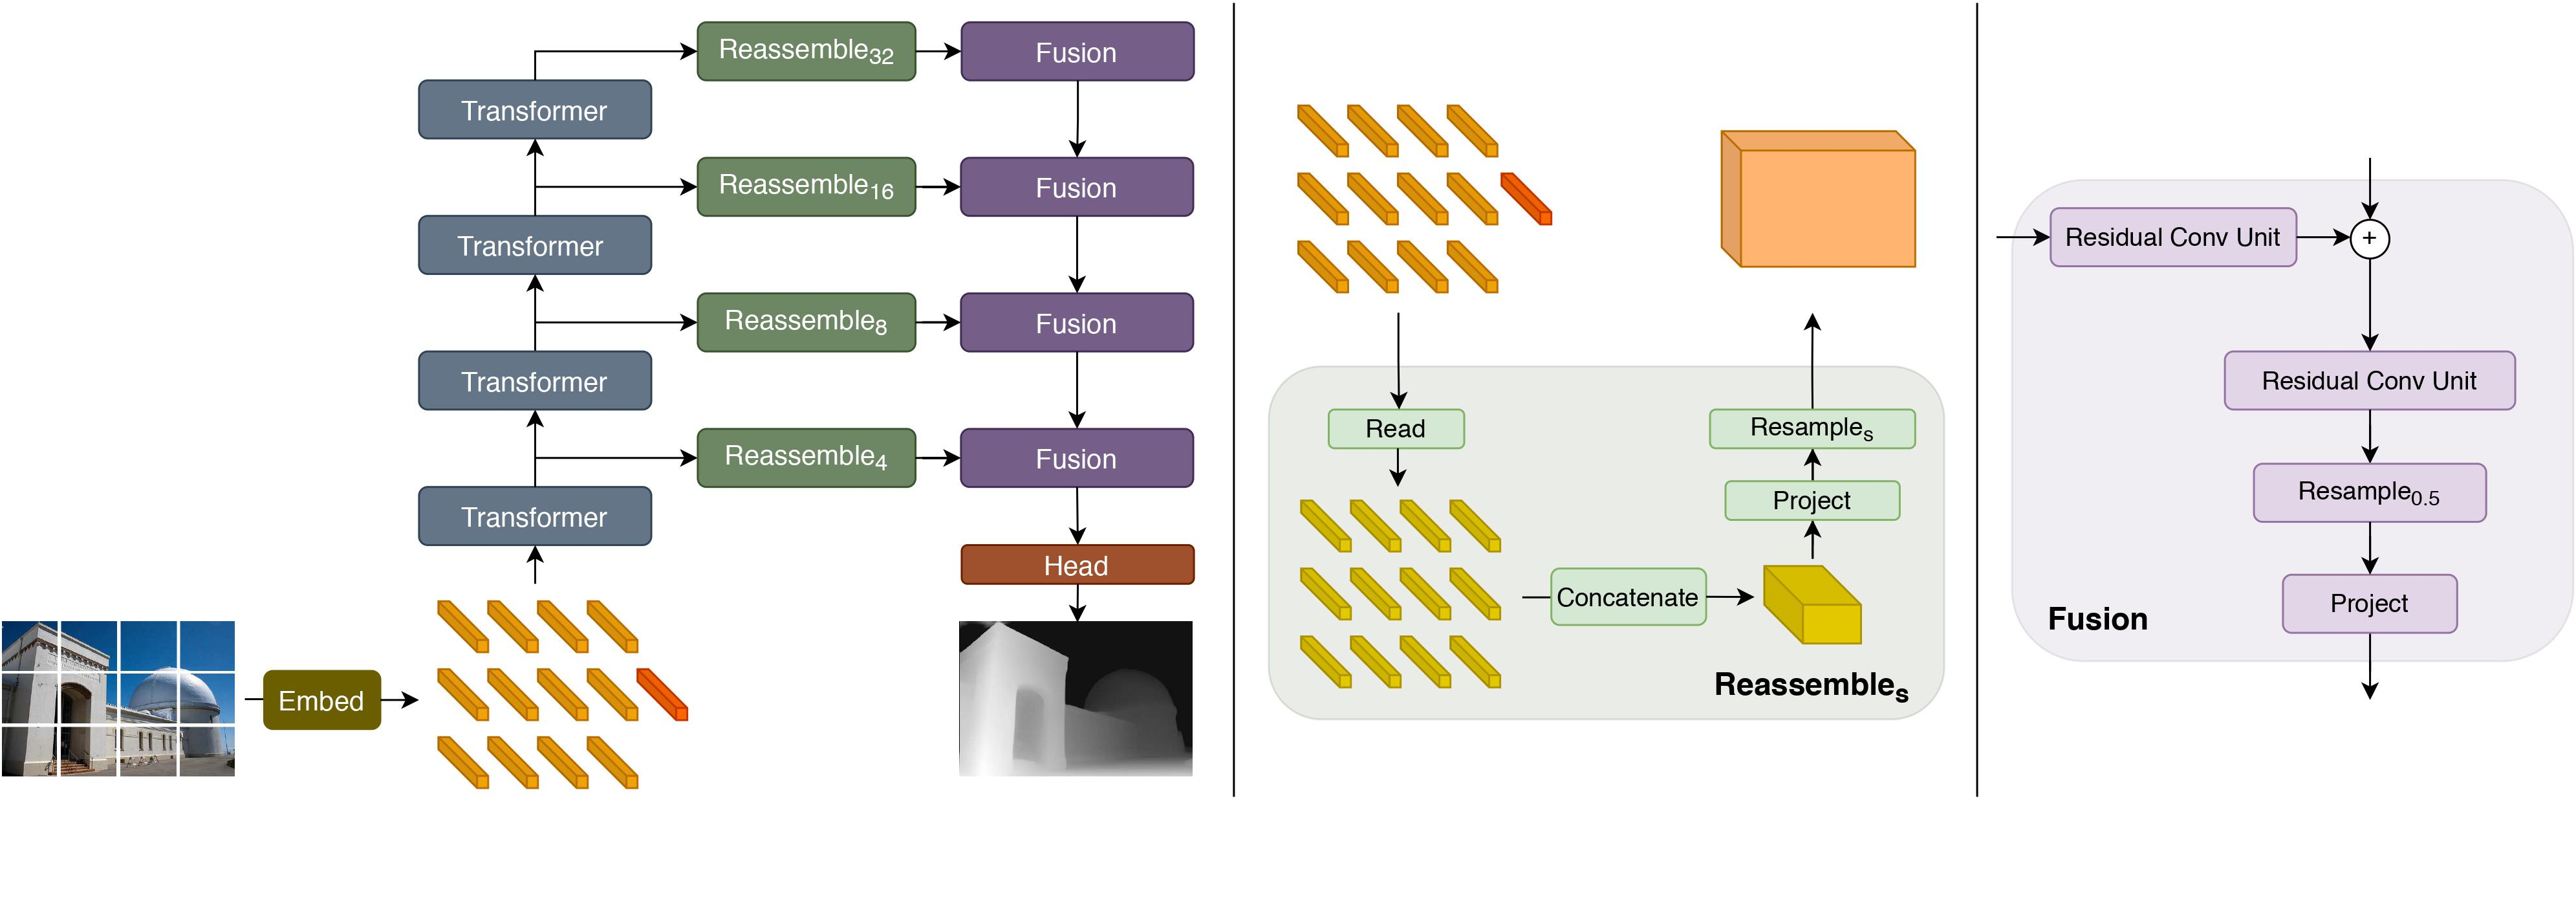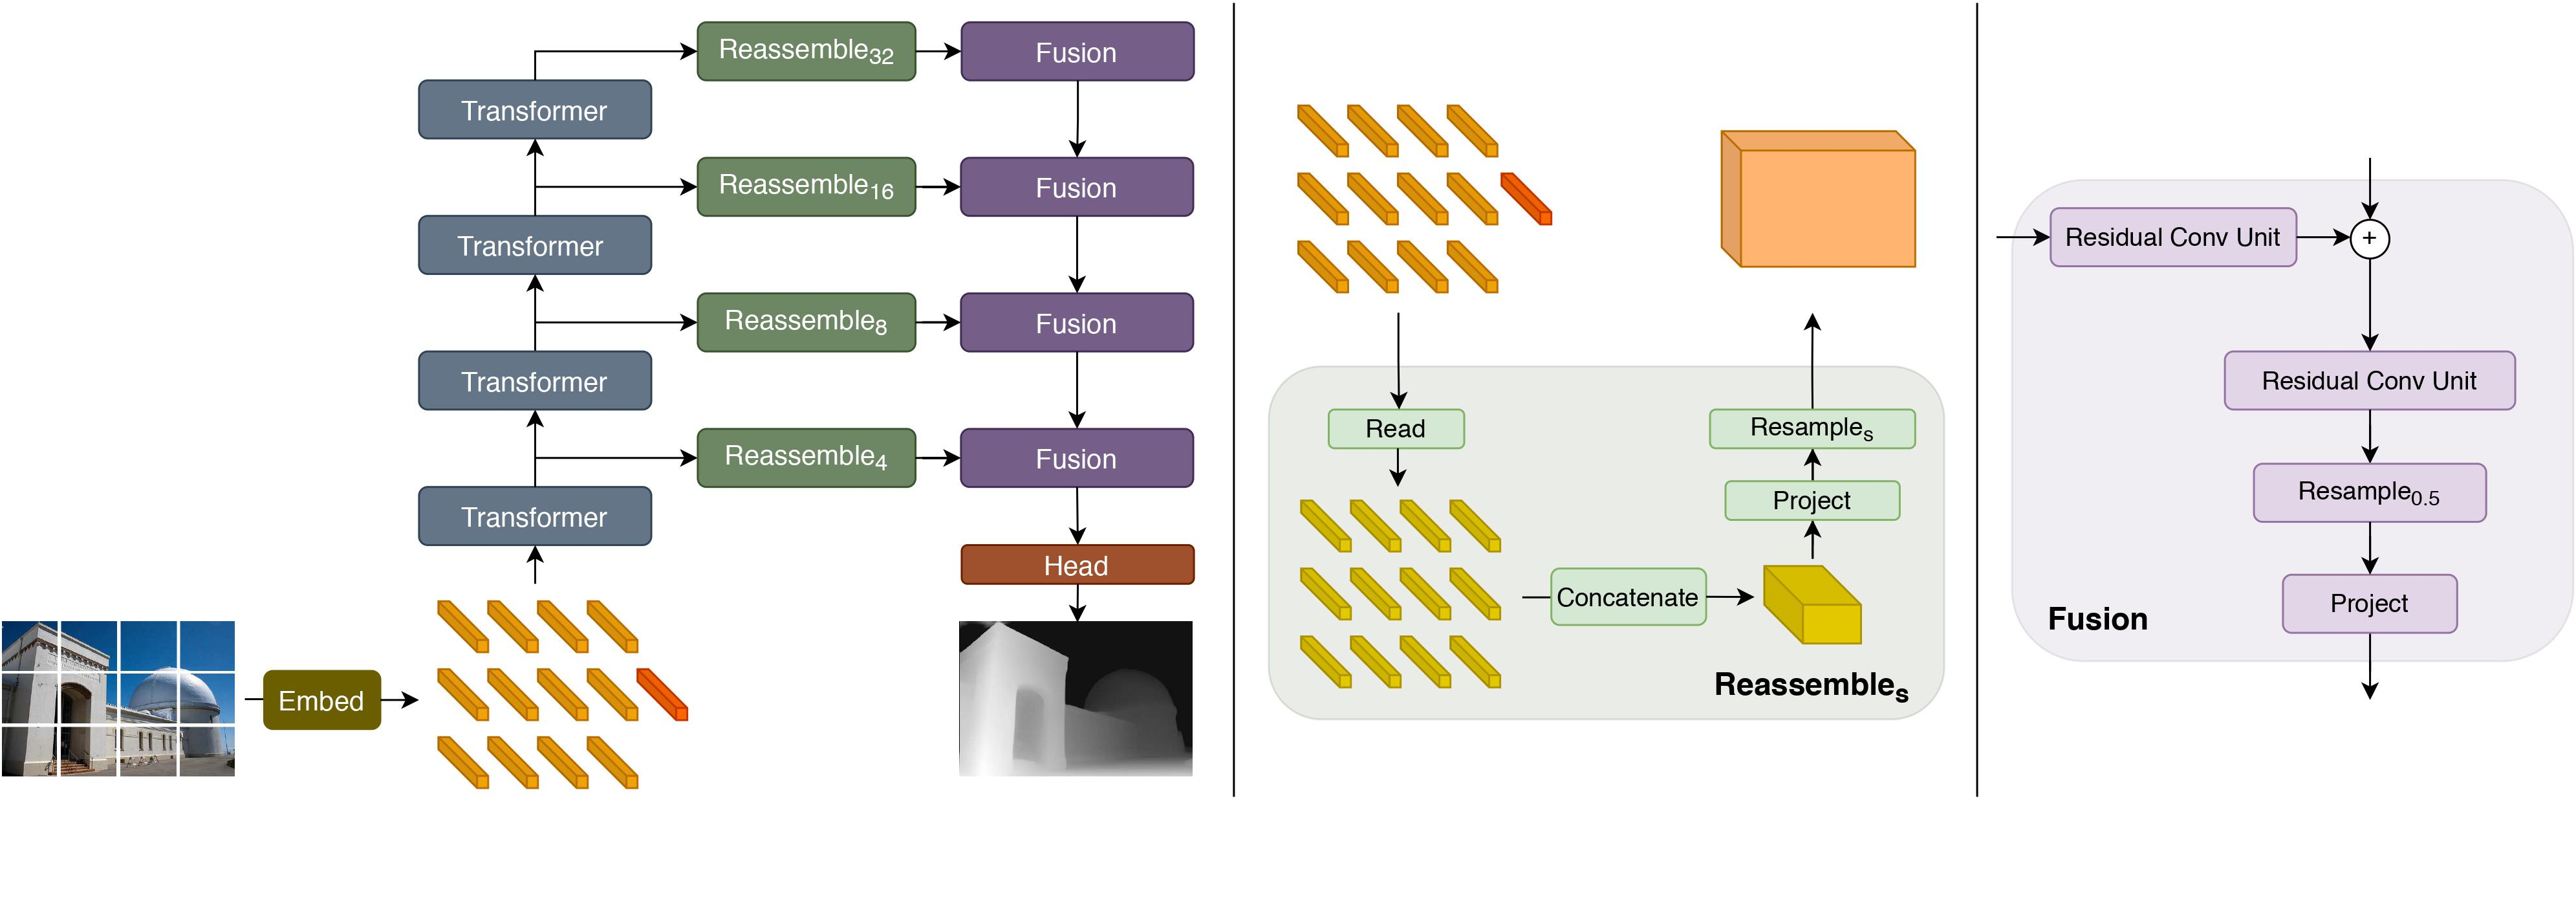

In [1]:
from transformers import DPTImageProcessor, DPTForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

In [45]:
# Exemplo:

url = 'https://www.studiomies.com.br/galeria/news/M/129_01_les_champs_osasco_projeto_arquitetura_residencial_apartamento_design_interiores.webp'
# url = "https://oliveiraalpinismo.com.br/wp-content/uploads/2019/01/2019-01-quando-fazer-a-pintura-de-fachada-do-predio-802x506.jpg"

# image = Image.open(url)
image = Image.open(requests.get(url, stream=True).raw)

In [46]:
processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")

In [47]:
%%time
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 3.71 s, sys: 260 ms, total: 3.97 s
Wall time: 3.22 s


In [48]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt")

In [49]:
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

In [50]:
# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)


In [51]:
# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

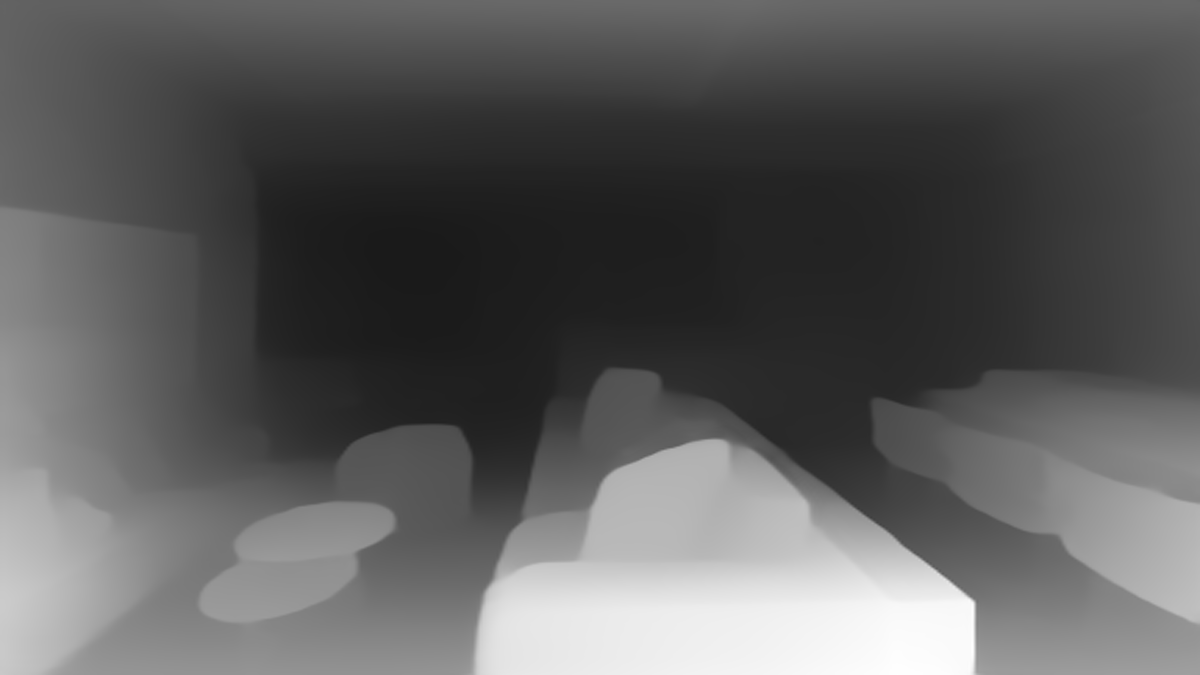

In [52]:
depth